# Memoria de EDA
<br>

# ***HIPÓTESIS***
<BR>

1. Los esfuerzos del gobierno para mejorar la salud mental no han sido efectivos.

2. Existe una correlación positiva entre la inflación y la cantidad de suicidios.

3. Los hombres jóvenes, de entre 15 y 30 años, constituyen el grupo con la mayor cantidad de suicidios.

4. Las comunidades con mayor población presentan una mayor cantidad de suicidios.

5. Los indicadores del sector de vivienda muestran una correlación positiva con la cantidad de suicidios.

6. A medida que aumentan la pobreza y los riesgos de exclusión social, también aumenta el número de suicidios.
.


# ***DATOS POR GÉNERO Y EDAD***

<br>

A continuación se presentarán los aspectos generales de los suicidios en España. Este conjunto de datos abarca el período desde 1980 hasta 2022 y muestra los números de suicidios clasificados por género y edad.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


spain = pd.read_csv('data/SuicidesinSpain.csv', delimiter='\t', encoding='latin-1')


El género con la mayor cantidad de suicidios en España son los hombres, representando una abrumadora mayoría del 75.1%.

Sexo
Hombres    102605
Mujeres     34108
Name: Total, dtype: int64


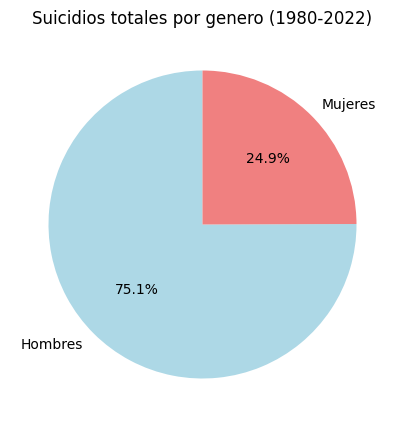

In [2]:
gender_suicides = spain.groupby('Sexo')['Total'].sum()

print(gender_suicides)
plt.figure(figsize=(6, 5))
plt.pie(gender_suicides, labels=gender_suicides.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Suicidios totales por genero (1980-2022)')
plt.show()



Se crea una función para agrupar los valores de la columna de edad en rangos, facilitando así la visualización de los datos.

Con apply, se aplica esta función a la columna de edad.

In [3]:


def convert_age_categories(age_category):
    if '95 y más años' in age_category:
        return '75+ años'
    elif '90 a 94 años' in age_category:
        return '75+ años'
    elif '85 a 89 años' in age_category:
        return '75+ años'
    elif '80 a 84 años' in age_category:
        return '75+ años'
    elif '75 a 79 años' in age_category:
        return '75+ años'
    elif '70 a 74 años' in age_category:
        return '55-74 años'
    elif '65 a 69 años' in age_category:
        return '55-74 años'
    elif '60 a 64 años' in age_category:
        return '55-74 años'
    elif '55 a 59 años' in age_category:
        return '55-74 años'
    elif '50 a 54 años' in age_category:
        return '35-54 años'
    elif '45 a 49 años' in age_category:
        return '35-54 años'
    elif '40 a 44 años' in age_category:
        return '35-54 años'
    elif '30 a 39 años' in age_category:
        return '25-34 años'
    elif '15 a 29 años' in age_category:
        return '15-24 años'
    elif '1 a 14 años' in age_category:
        return '5-14 años'
    else:
        return age_category
    



spain['Edad'] = spain['Edad'].apply(convert_age_categories)

print(spain['Edad'].unique())



['5-14 años' '15-24 años' '25-34 años' '35-54 años' '55-74 años'
 '75+ años']


Ahora se procederá a visualizar los grupos con mayor cantidad de casos reportados, categorizados por edad y género.

Sexo     Edad      
Hombres  15-24 años    14045
         25-34 años    14366
         35-54 años    25212
         5-14 años       376
         55-74 años    29712
         75+ años      18894
Mujeres  15-24 años     3565
         25-34 años     4006
         35-54 años     8147
         5-14 años       139
         55-74 años    11835
         75+ años       6416
Name: Total, dtype: int64


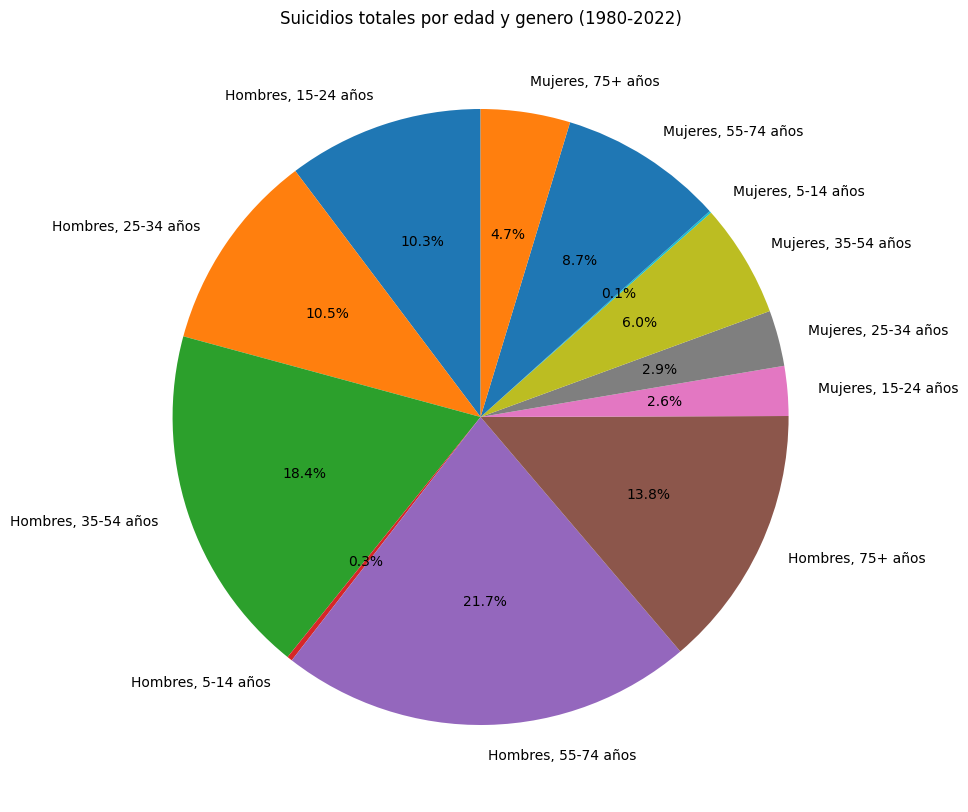

In [4]:
gender_age_suicides = spain.groupby(['Sexo', 'Edad'])['Total'].sum()


print(gender_age_suicides)
gender_age_suicides_flat = gender_age_suicides.reset_index()



#Flat concatena las categorias de genero con edad
gender_age_suicides_flat['label'] = gender_age_suicides_flat['Sexo'] + ', ' + gender_age_suicides_flat['Edad']

plt.figure(figsize=(10, 10))
plt.pie(gender_age_suicides_flat['Total'], labels=gender_age_suicides_flat['label'], autopct='%1.1f%%', startangle=90)
plt.title('Suicidios totales por edad y genero (1980-2022)')
plt.show()

El grupo de edad con la mayor cantidad de suicidios en hombres comprende las edades de 55 a 74 años, seguido por el grupo de 35 a 54 años. Esta misma tendencia se repite en las mujeres, donde el grupo de 55 a 74 años también registra la mayor cantidad de casos, seguido por el grupo de 35 a 54 años. Además, tanto en hombres como en mujeres, el tercer grupo con mayor cantidad de suicidios es el de 75 años en adelante.
<br>

Al graficar la tendencia de suicidios en hombres, se observa que históricamente los grupos de 55 a 74 años y de 35 a 54 años han registrado un mayor número de incidencias. Este patrón se ha mantenido constante a lo largo del tiempo.

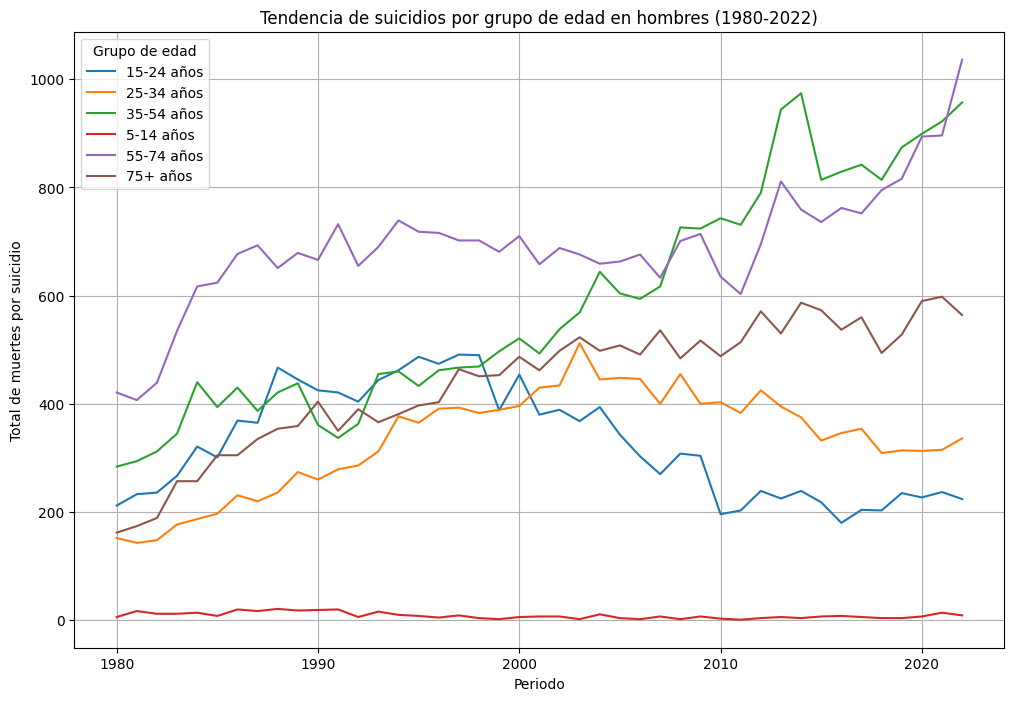

In [5]:
men_data = spain[spain['Sexo'] == 'Hombres']

# Agrupa por edad y periodo y convierte los grupos de edades en columnas con el unstack
men_age_groups = men_data.groupby(['Periodo', 'Edad'])['Total'].sum().unstack()


plt.figure(figsize=(12, 8))

#Añade al plt los graficos de la tendencia de los suicidios

for age_group in men_age_groups.columns:
    plt.plot(men_age_groups.index, men_age_groups[age_group], label=age_group)

plt.title('Tendencia de suicidios por grupo de edad en hombres (1980-2022)')
plt.xlabel('Periodo')
plt.ylabel('Total de muertes por suicidio')
plt.legend(title='Grupo de edad', loc='upper left')
plt.grid(True)
plt.show()







En las mujeres, se observa un patrón similar. Los tres grupos de edades con mayor incidencia de suicidios son consistentes: 55 a 74 años, 35 a 54 años y 75 años en adelante. Este fenómeno se mantiene constante a lo largo del período analizado.

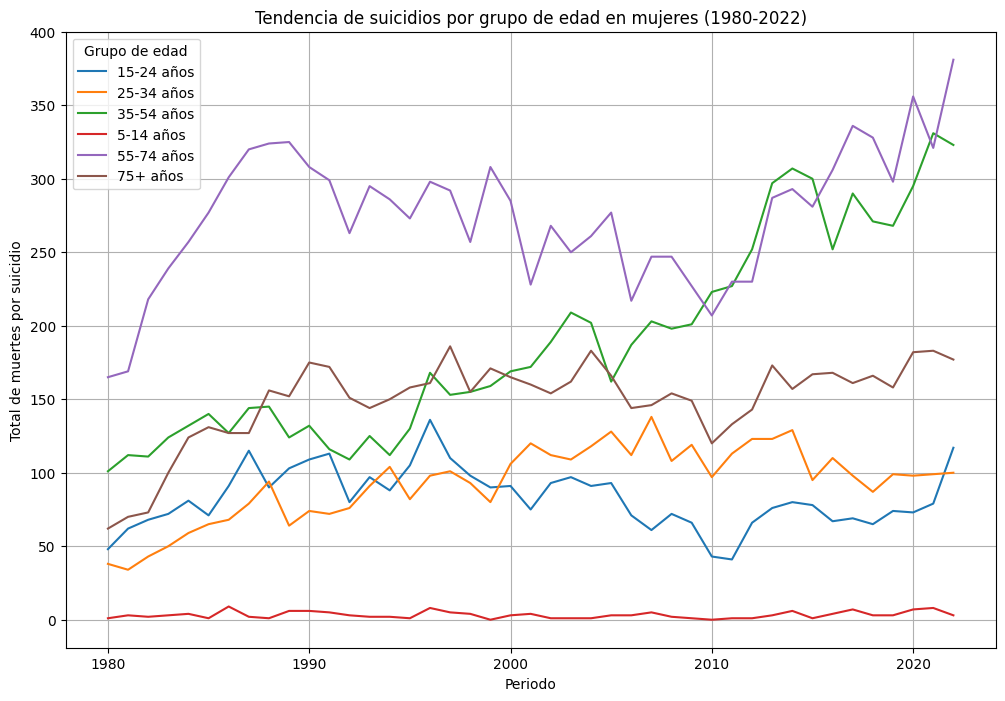

In [6]:
women_data = spain[spain['Sexo'] == 'Mujeres']

# Agrupa por edad y periodo y convierte los grupos de edades en columnas con el unstack
women_age_groups = women_data.groupby(['Periodo', 'Edad'])['Total'].sum().unstack()


plt.figure(figsize=(12, 8))

#Añade al plt los graficos de la tendencia de los suicidios

for age_group in women_age_groups.columns:
    plt.plot(women_age_groups.index, women_age_groups[age_group], label=age_group)

plt.title('Tendencia de suicidios por grupo de edad en mujeres (1980-2022)')
plt.xlabel('Periodo')
plt.ylabel('Total de muertes por suicidio')
plt.legend(title='Grupo de edad', loc='upper left')
plt.grid(True)
plt.show()


Ahora se va  a analizar los métodos de suicidio clasificados por género, utilizando datos específicos del año 2022.El método de suicidio más común entre los hombres fue el ahorcamiento, mientras que para las mujeres fue lanzarse desde lugares elevados. Aunque estos datos específicos corresponden solo al año 2022, proporcionan una indicación de las tendencias de métodos de suicidio clasificados por género.

C:\Users\sebas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sebas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


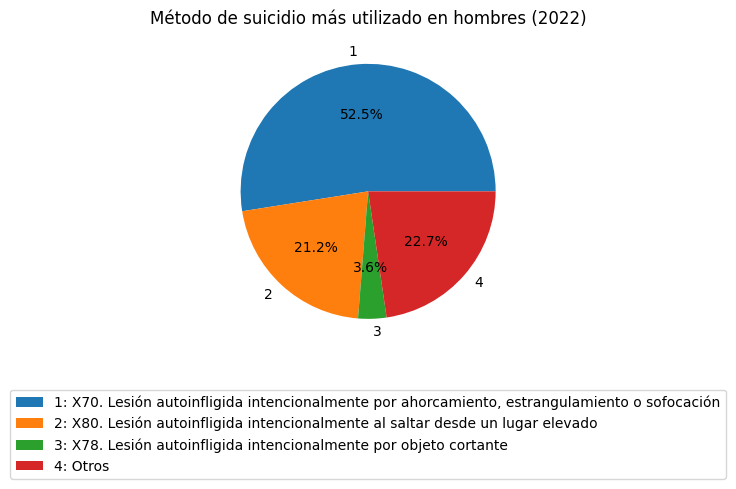

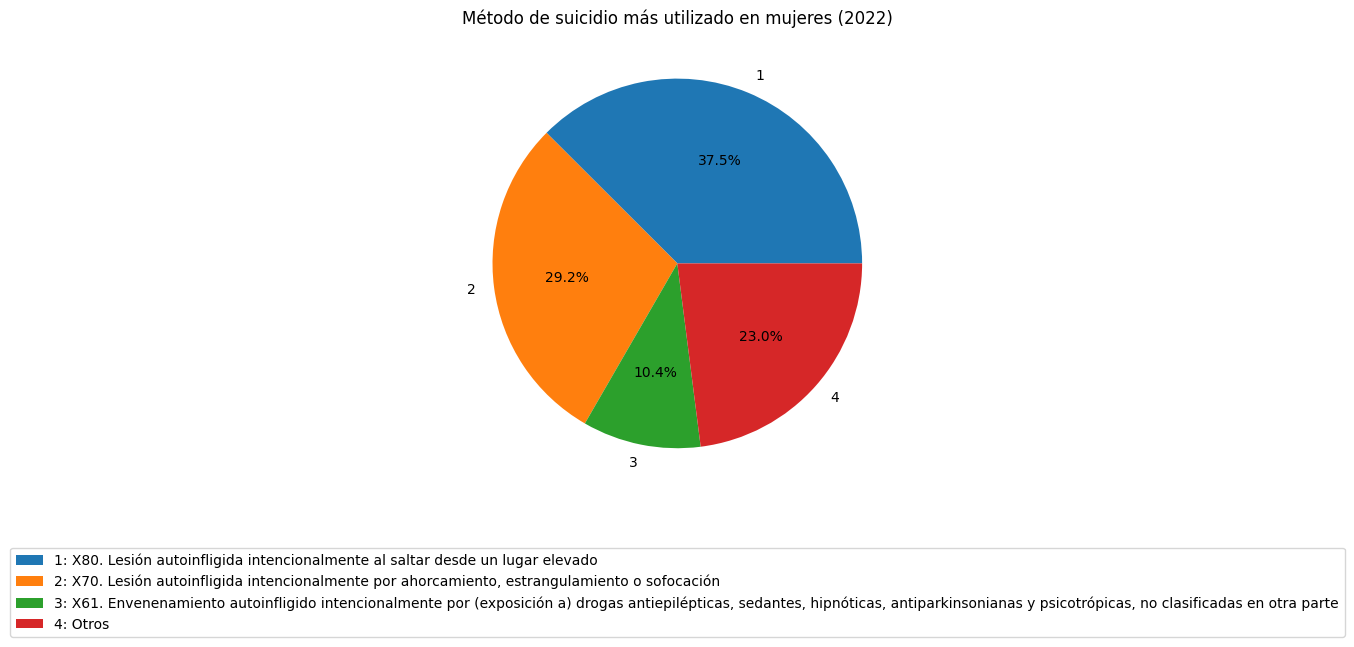

In [7]:
spain_method=pd.read_csv('data/Suicidio_porMetodoEmpleado.csv',delimiter='\t',encoding='latin-1' )



#Pasar a float
spain_method['Total'] = spain_method['Total'].str.replace(',', '.').astype(float)


spain_method = spain_method[spain_method['Medio empleado'] != 'Total']

# Agrupar por medio empleado y sexo
method_totals = spain_method.groupby(['Medio empleado', 'Sexo'])['Total'].sum()


method_totals = method_totals.reset_index()

# Organiza por mayor cantidad de suicidios por metodo
method_totals = method_totals.sort_values(by=['Sexo', 'Total'], ascending=[True, False])

# Conseguir los top 3 metodos
top_methods = method_totals.groupby('Sexo').head(3)

# Calcular los suicidios totales
total_suicides = method_totals.groupby('Sexo')['Total'].sum()

# Crea el dataframe para los metodos
top_methods_df = pd.DataFrame(columns=['Medio empleado', 'Sexo', 'Total'])


for gender, group_data in top_methods.groupby('Sexo'):
    top_methods_df = top_methods_df.append(group_data)
    otros_total = total_suicides[gender] - group_data['Total'].sum()
    top_methods_df = top_methods_df.append({'Medio empleado': 'Otros', 'Sexo': gender, 'Total': otros_total}, ignore_index=True)

# Separar los metodos de hombres y mujeres
men_data = top_methods_df[top_methods_df['Sexo'] == 'Hombres']
women_data = top_methods_df[top_methods_df['Sexo'] == 'Mujeres']

# Crear el mapa para la leyenda
name_index_mapping_men = {name: i + 1 for i, name in enumerate(men_data['Medio empleado'].unique())}
name_index_mapping_women = {name: i + 1 for i, name in enumerate(women_data['Medio empleado'].unique())}


men_data['index'] = men_data['Medio empleado'].map(name_index_mapping_men)
women_data['index'] = women_data['Medio empleado'].map(name_index_mapping_women)

# Pie chart de hombres
plt.figure(figsize=(6, 6))
plt.pie(men_data['Total'], labels=men_data['index'], autopct='%1.1f%%')
plt.title('Método de suicidio más utilizado en hombres (2022)')

# Crear la leyenda
legend_labels_men = [f"{index}: {name}" for name, index in name_index_mapping_men.items()]
plt.legend(legend_labels_men, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1)

plt.tight_layout()
plt.show()

# Pie chart para mujeres
plt.figure(figsize=(6,6))
plt.pie(women_data['Total'], labels=women_data['index'], autopct='%1.1f%%')
plt.title('Método de suicidio más utilizado en mujeres (2022)')

# leyenda para mujer
legend_labels_women = [f"{index}: {name}" for name, index in name_index_mapping_women.items()]
plt.legend(legend_labels_women, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1)


plt.show()

# ***DATOS POR COMUNIDAD AUTÓNOMA***

En este análisis, se investigarán las tendencias de suicidio en España utilizando datos desglosados por comunidad autónoma.

Andalucía se posiciona como la comunidad autónoma con la mayor cantidad de suicidios, registrando más de 20,000 casos desde 1996 hasta 2021.

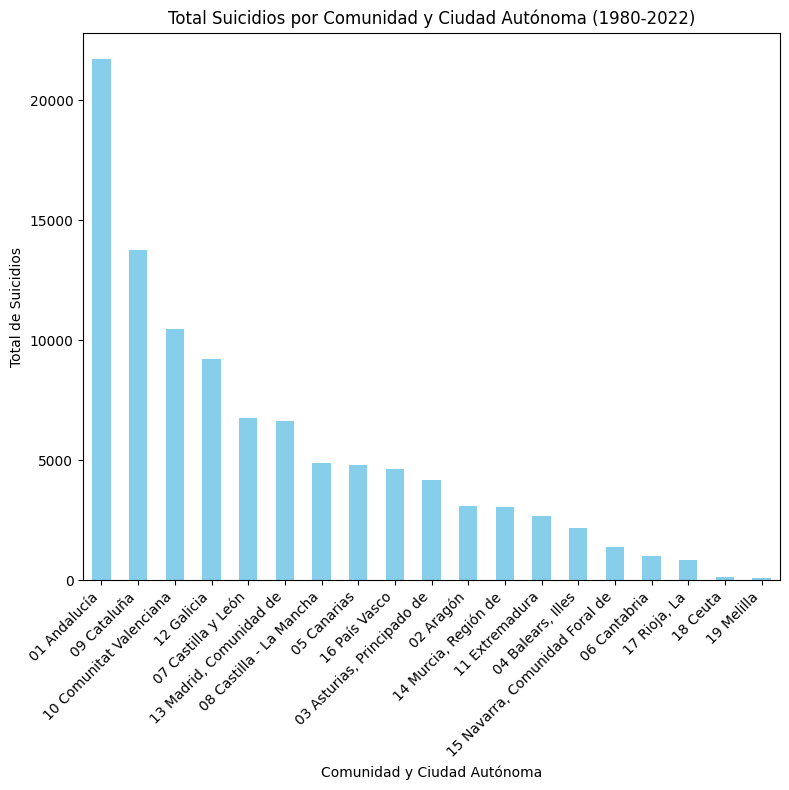

array([21718, 13775, 10457,  9235,  6756,  6628,  4874,  4820,  4625,
        4157,  3113,  3056,  2658,  2168,  1404,  1020,   846,   148,
         101], dtype=int64)

In [8]:
#Agrupar la cantidad de suicidios por region

spain_region=pd.read_csv('data/Suicidio_porComunidad.csv',delimiter='\t',encoding='latin-1')

total_deathsbyregion=spain_region.groupby('Comunidades y Ciudades Autónomas')['Total'].sum()
total_deathsbyregion=total_deathsbyregion.sort_values(ascending=False)
plt.figure(figsize=(8, 8))
total_deathsbyregion.plot(kind='bar', color='skyblue')
plt.title('Total Suicidios por Comunidad y Ciudad Autónoma (1980-2022)')
plt.xlabel('Comunidad y Ciudad Autónoma')
plt.ylabel('Total de Suicidios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.tight_layout()
plt.show()

total_deathsbyregion.values

Al analizar los datos de población y suicidios por comunidad autónoma, se destaca que Andalucía, Cataluña y Madrid son las comunidades con mayor población, mientras que las cinco comunidades con más suicidios son Andalucía, Cataluña, Comunitat Valenciana, Galicia y Castilla y León. A pesar de que la diferencia en población entre Comunitat Valenciana y Galicia es de más de 5 millones de personas, la diferencia en la cantidad de suicidios entre estas dos comunidades es de solo  alrededor de mil casos. Esto sugiere que la disparidad en la población no se refleja de manera significativa en las tasas de suicidio

[[1.         0.54339845]
 [0.54339845 1.        ]]


C:\Users\sebas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


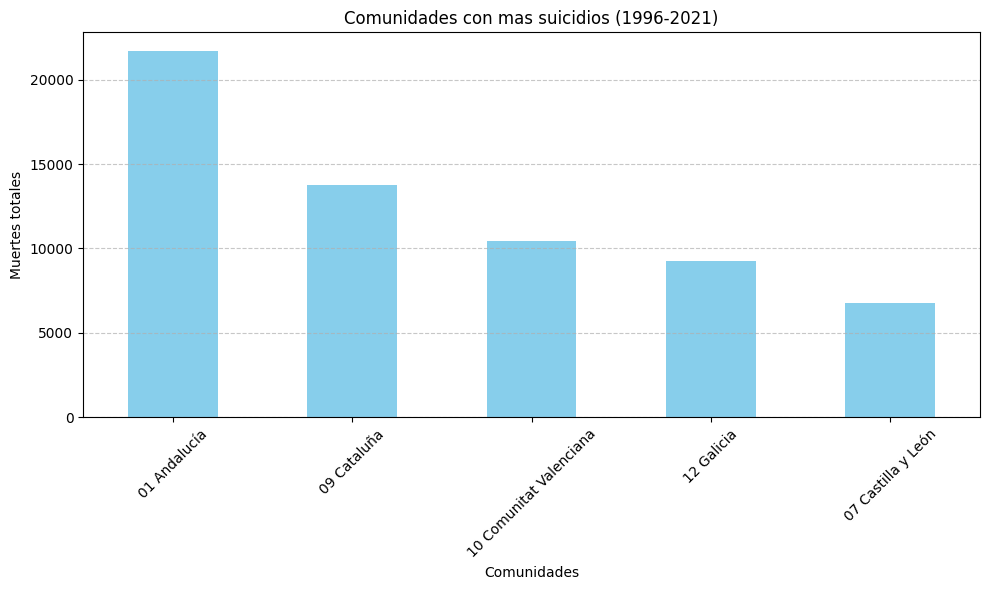

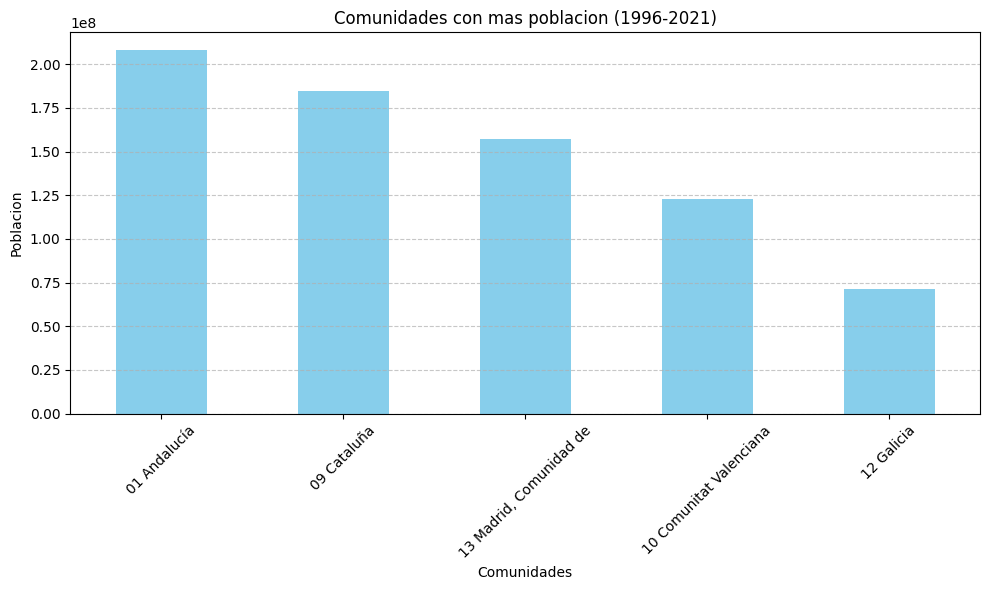

In [76]:
population_byregion=pd.read_csv('data/Poblacion_porComunidad.csv',delimiter='\t',encoding='latin-1' )

population_byregion=population_byregion.drop('Nacional',axis=1)
population_byregion

population_byregion['Total'] = population_byregion['Total'].str.replace('.', '').astype(float)

# Grupar por comunidad y en el año 1997 añadir el valor del año anterior
population_byregion['Total'] = population_byregion.groupby('Comunidades y Ciudades Autónomas')['Total'].fillna(method='ffill')

population_growth = population_byregion.groupby(['Comunidades y Ciudades Autónomas', 'Periodo'])['Total'].sum()

population_growth=population_byregion.groupby(['Periodo'])['Total'].sum()




#Sumando todos los suicidios y agrupandolos por año
spaintotal_deathsbyyear=spain.groupby('Periodo')['Total'].sum()


total_deaths1996to2021=spaintotal_deathsbyyear[(spaintotal_deathsbyyear.index >= 1996) & (spaintotal_deathsbyyear.index <= 2021)] 

print(np.corrcoef(population_growth.values,total_deaths1996to2021.values))


total_deaths1996to2021

top_5_deathsinregions=total_deathsbyregion.sort_values(ascending=False).head(5)



plt.figure(figsize=(10, 6))
top_5_deathsinregions.plot(kind='bar', color='skyblue')
plt.title('Comunidades con mas suicidios (1996-2021)')
plt.xlabel('Comunidades')
plt.ylabel('Muertes totales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


population_byregion.groupby('Comunidades y Ciudades Autónomas')['Total'].sum()


top_5_growthinregions=population_byregion.groupby('Comunidades y Ciudades Autónomas')['Total'].sum().sort_values(ascending=False).head(5)



plt.figure(figsize=(10, 6))
top_5_growthinregions.plot(kind='bar', color='skyblue')
plt.title('Comunidades con mas poblacion (1996-2021)')
plt.xlabel('Comunidades')
plt.ylabel('Poblacion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




La cantidad total de suicidios por año nos da una primera idea del problema, y muestra que las comunidades más pobladas no siempre son las que tienen más suicidios. Pero para entender mejor la gravedad del problema, es necesario considerar las tasas de suicidio, que se definen como la cantidad de suicidios por cada 100 mil personas. Según estos datos, Asturias tiene la tasa más alta de suicidios, seguida de Galicia. Además, Canarias y Castilla y León intercambian el tercer puesto en la lista.

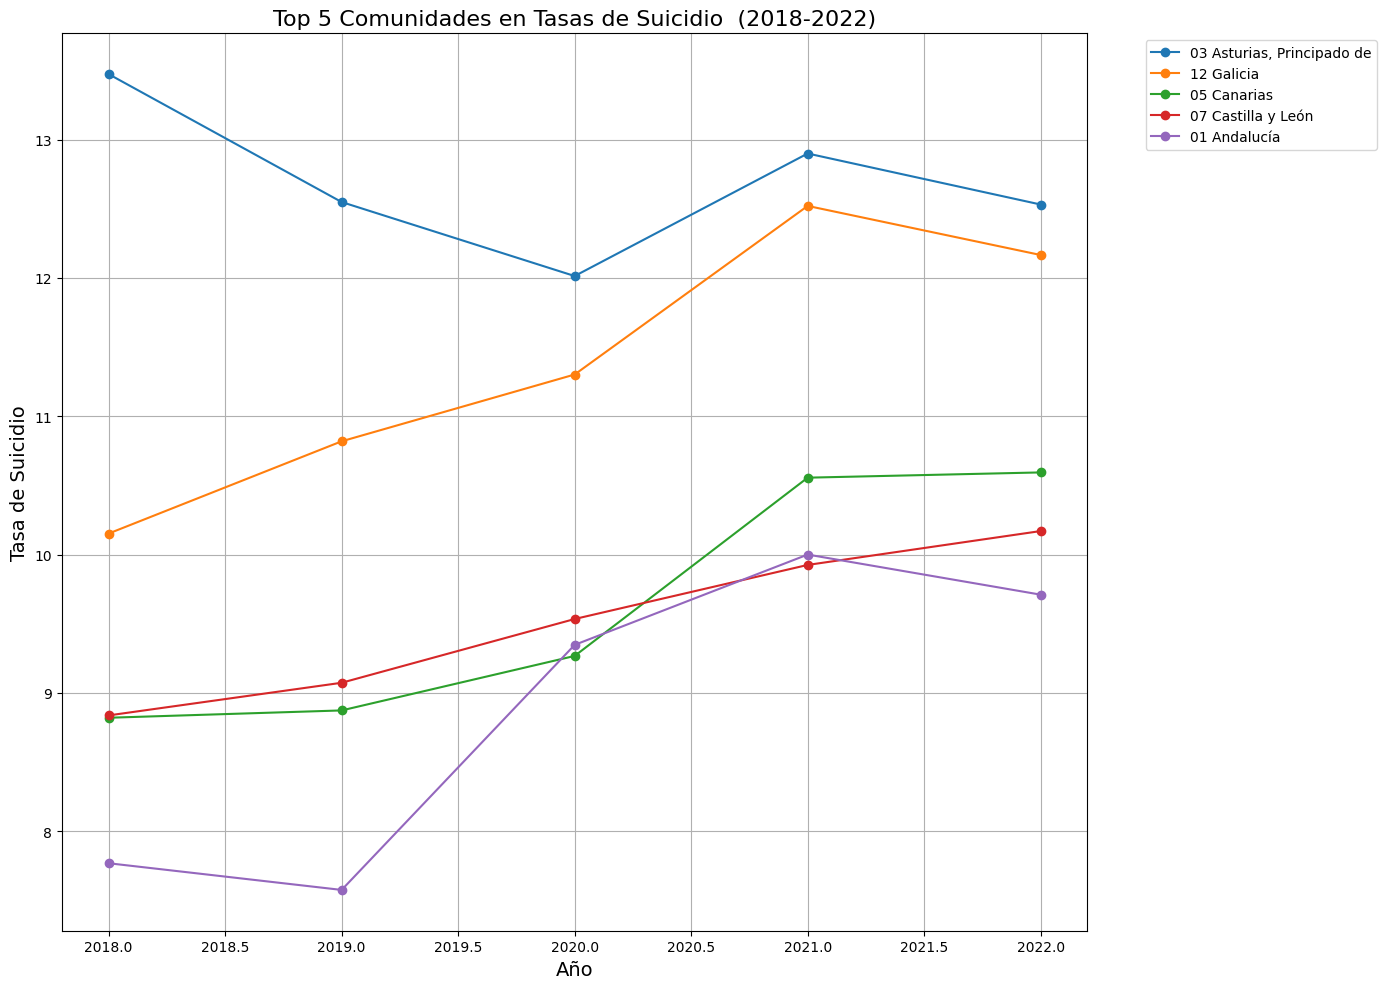

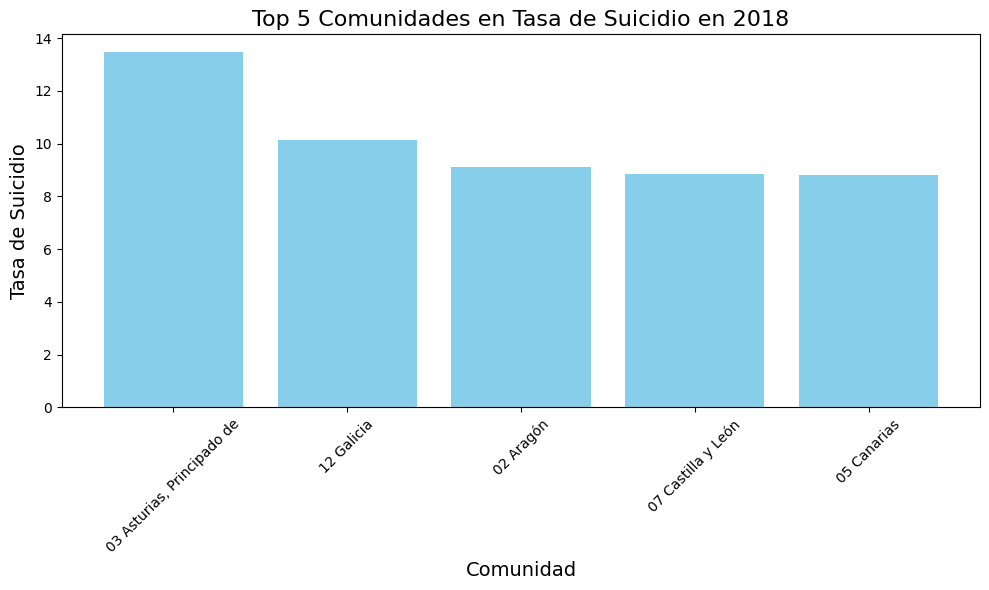

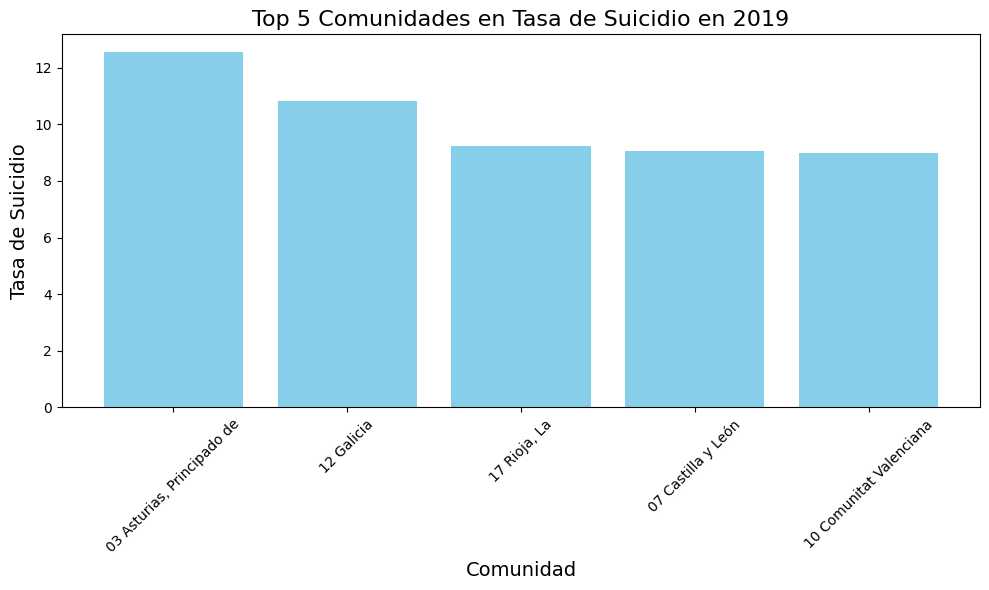

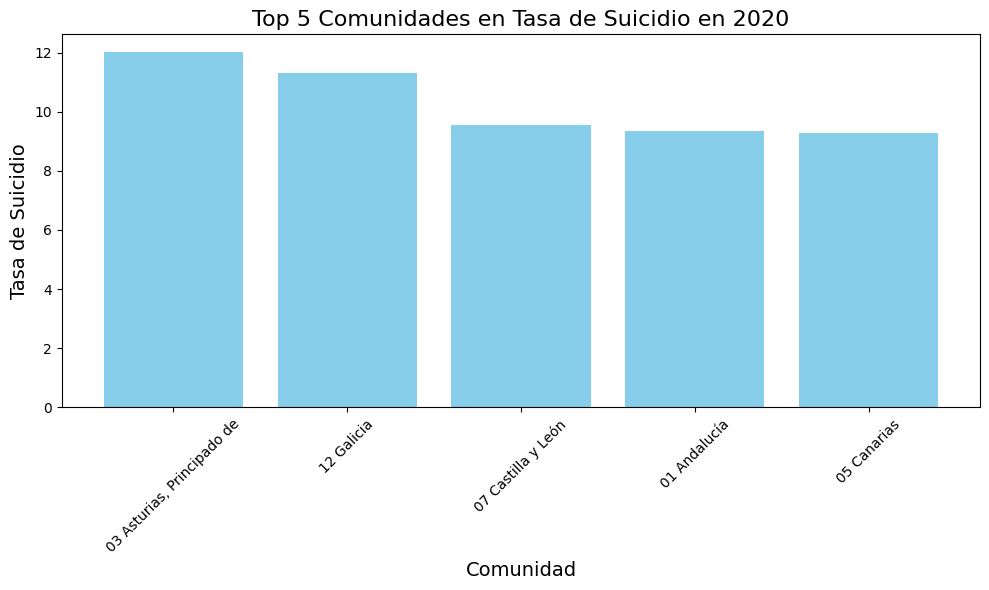

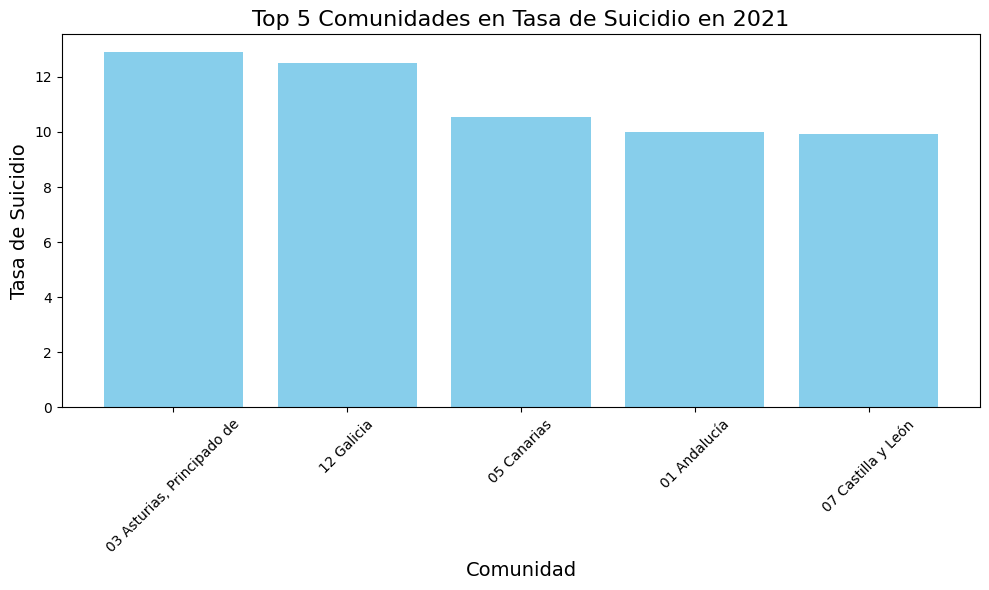

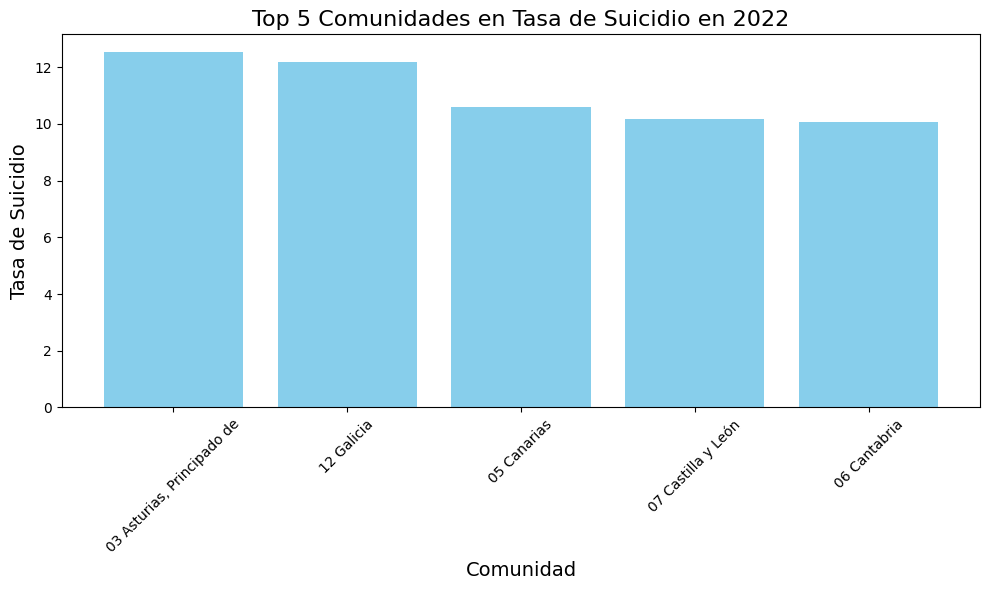

In [79]:

# Leer el DataFrame del archivo CSV
tasa = pd.read_csv('data/Tasa_sui.csv', delimiter='\t', encoding='latin-1')

# Eliminar la columna 'Total Nacional'
tasa.drop(columns='Total Nacional', inplace=True)

# Reemplazar comas con puntos en la columna 'Total' y convertir a float
tasa['Total'] = tasa['Total'].str.replace(',', '.').astype(float)

# Calcular la tasa de suicidio promedio para cada comunidad a lo largo de los años
tasas_promedio = tasa.groupby('Comunidades y Ciudades Autónomas')['Total'].mean()

# Ordenar comunidades según sus tasas de suicidio promedio y seleccionar las 5 mejores
top_5_comunidades = tasas_promedio.sort_values(ascending=False).head(5).index

# Filtrar el DataFrame para incluir datos solo para las 5 mejores comunidades
datos_top_5 = tasa[tasa['Comunidades y Ciudades Autónomas'].isin(top_5_comunidades)]

# Crear un gráfico de líneas más grande
plt.figure(figsize=(14, 10))
for comunidad in top_5_comunidades:
    datos_comunidad = datos_top_5[datos_top_5['Comunidades y Ciudades Autónomas'] == comunidad]
    plt.plot(datos_comunidad['Periodo'], datos_comunidad['Total'], marker='o', label=comunidad)

plt.xlabel('Año', fontsize=14)
plt.ylabel('Tasa de Suicidio', fontsize=14)
plt.title('Top 5 Comunidades en Tasas de Suicidio  (2018-2022)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Crear gráficos de barras para las 5 mejores comunidades para cada año de 2018 a 2022
años = [2018, 2019, 2020, 2021, 2022]

for año in años:
    datos_año = tasa[tasa['Periodo'] == año]
    top_5_año = datos_año.nlargest(5, 'Total')
    
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_año['Comunidades y Ciudades Autónomas'], top_5_año['Total'], color='skyblue')
    plt.title(f'Top 5 Comunidades en Tasa de Suicidio en {año}', fontsize=16)
    plt.xlabel('Comunidad', fontsize=14)
    plt.ylabel('Tasa de Suicidio', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ***FACTORES SOCIOECONOMICOS***
<br>

Lo primero que se va a analizar es la correlación entre el número total de suicidios y la tasa de inflación. Se encontró un coeficiente de correlación positivo notablemente alto de 0.92 para los suicidios de hombres y 0.80 para los suicidios de mujeres. Aunque el conjunto de datos es limitado, abarcando solo 4 años, se calculó el coeficiente de correlación entre la tasa de suicidios y la inflación, resultando en 0.68.

[[1.         0.92155584]
 [0.92155584 1.        ]]
[[1.         0.79873916]
 [0.79873916 1.        ]]
[[1.         0.67901995]
 [0.67901995 1.        ]]


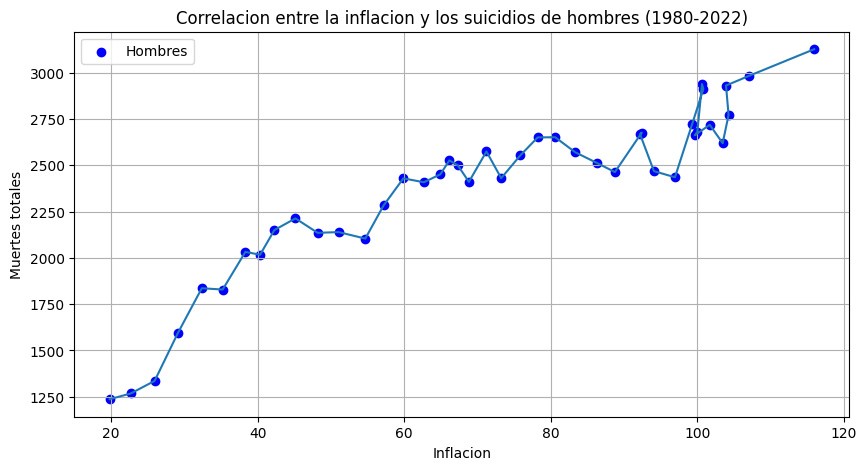

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


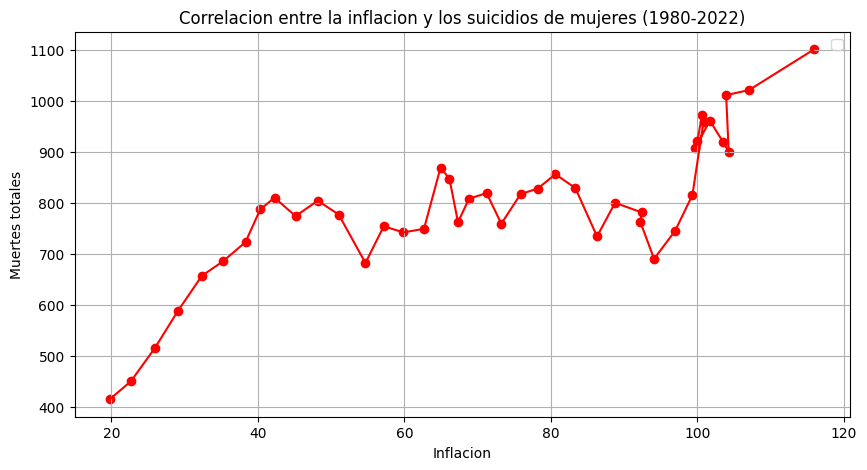

In [100]:
inflation_spain=pd.read_csv('data/WEO_Data.csv',delimiter='\t', encoding='latin-1')

inflation_spain = inflation_spain[inflation_spain['Country'] == 'Spain']
inflation_spain.drop(['Country','Subject Descriptor','Units', 'Scale', 'Country/Series-specific Notes','Estimates Start After',',,'],axis=1,inplace=True)

inflation_spain

mask=spain['Sexo']=='Hombres'
spain_men=spain[mask]

total_deathsmen=spain_men.groupby('Periodo')['Total'].sum()




print(np.corrcoef(total_deathsmen.values,inflation_spain.values))


mask=spain['Sexo']=='Mujeres'
spain_women=spain[mask]



total_deathswomen=spain_women.groupby('Periodo')['Total'].sum()

print(np.corrcoef(total_deathswomen.values,inflation_spain.values))

inflation_spain_filtered = inflation_spain[['2018', '2019', '2020', '2021', '2022']]

inflation_rates = inflation_spain_filtered.values.ravel()


tasa_byyear=tasa.groupby('Periodo')['Total'].sum()

print(np.corrcoef(inflation_rates,tasa_byyear))


# Plot de hombres
plt.figure(figsize=(10, 5))
plt.scatter(inflation_spain.values, total_deathsmen.values, color='blue', label='Hombres')
plt.title('Correlacion entre la inflacion y los suicidios de hombres (1980-2022)')
plt.xlabel('Inflacion')
plt.ylabel('Muertes totales')
plt.legend()
plt.grid(True)
plt.plot(inflation_spain.iloc[0,:],total_deathsmen.values)
plt.show()



# Plot de mujeres
plt.figure(figsize=(10, 5))
plt.scatter(inflation_spain.values, total_deathswomen.values, color='red')
plt.title('Correlacion entre la inflacion y los suicidios de mujeres (1980-2022)')
plt.xlabel('Inflacion')
plt.ylabel('Muertes totales')
plt.plot(inflation_spain.iloc[0,:],total_deathswomen.values, color='red')
plt.legend()
plt.grid(True)
plt.show()




Se evaluó la relación entre el presupuesto destinado a hospitales mentales y la cantidad de suicidios en hombres. Además, se calculó el porcentaje del presupuesto de sanidad asignado a la salud mental entre los años 2003 y 2021. Se observó una correlación positiva entre la cantidad de presupuesto y la cantidad de suicidios en hombres. Esta correlacion es de 0.56 Aunque esta correlación no indica causalidad, sugiere que los esfuerzos para reducir este número de muertes pueden no haber sido efectivos.  Además, al analizar el porcentaje, se notó que,a pesar de que el presupuesto para hospitales mentales aumenta cada año,  siempre permanece en torno al 0.80% del presupuesto total de sanidad pública.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1.         0.55628339]
 [0.55628339 1.        ]]


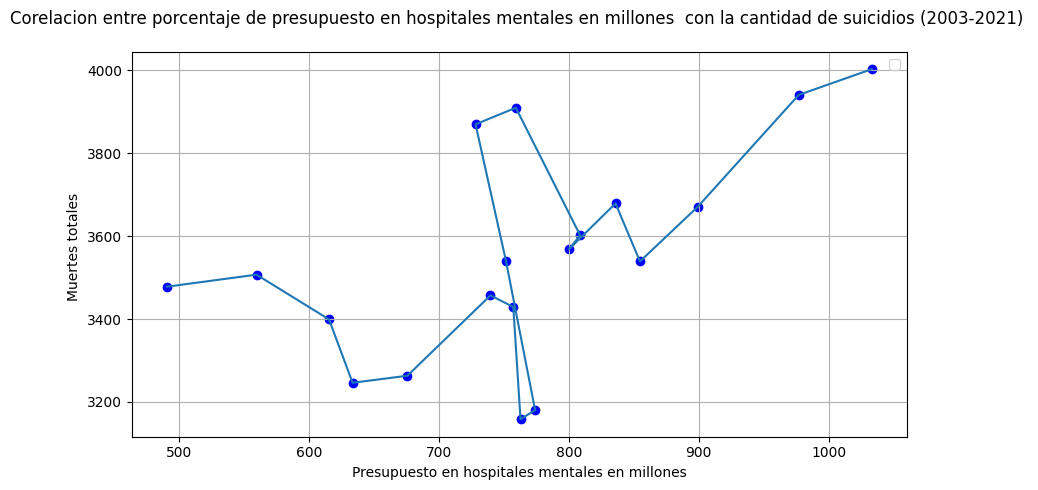

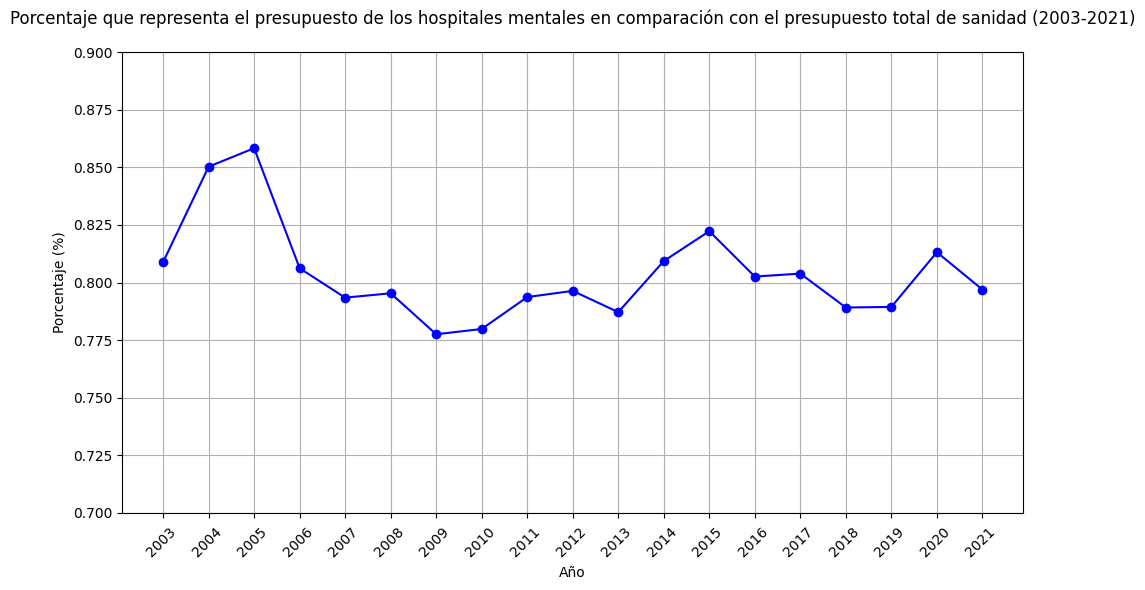

In [104]:
total_budget=pd.read_csv('data/Presupuesto_total.tsv',delimiter='\t',encoding='latin-1' )

total_budget.drop('freq,unit,icha11_hp,geo\TIME_PERIOD',axis=1,inplace=True)

mental_budget=pd.read_csv('data/Presupuesto_Mental.tsv',delimiter='\t', encoding='latin-1')

mental_budget.drop('freq,unit,icha11_hp,geo\TIME_PERIOD',axis=1,inplace=True)

mental_budget

#Sacando los porcentajes
percentage_budget = (mental_budget / total_budget) * 100


percentage_budget.drop('2022 ',axis=1,inplace=True)



spaintotal_deathsbyyear2003to2022=spaintotal_deathsbyyear[(spaintotal_deathsbyyear.index>=2003) & (spaintotal_deathsbyyear.index<2022)]

np.corrcoef(percentage_budget.values,spaintotal_deathsbyyear2003to2022)
print(np.corrcoef(mental_budget.values,spaintotal_deathsbyyear2003to2022.values))




plt.figure(figsize=(10, 5))
plt.scatter(mental_budget.values, spaintotal_deathsbyyear2003to2022.values, color='blue')
plt.title('Corelacion entre porcentaje de presupuesto en hospitales mentales en millones  con la cantidad de suicidios (2003-2021) ',pad=20)
plt.xlabel('Presupuesto en hospitales mentales en millones')
plt.ylabel('Muertes totales ')
plt.legend()
plt.plot(mental_budget.squeeze(), spaintotal_deathsbyyear2003to2022.values)
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(percentage_budget.columns, percentage_budget.iloc[0], marker='o', linestyle='-', color='b')

plt.title('Porcentaje que representa el presupuesto de los hospitales mentales en comparación con el presupuesto total de sanidad (2003-2021)', pad=20)
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.xticks(rotation=45)

# Set the y-axis limits to show the variation around 0.80 more effectively
plt.ylim(0.70, 0.90)

plt.tight_layout()
plt.show()


Se examinó la relación entre la cantidad de camas psiquiátricas y la incidencia de suicidios, evidenciando una correlación negativa. Esta correlacion siendo de -0.87.  Esto implica que a medida que la cantidad de camas psiquiátricas disminuye, la tasa de suicidios tiende a aumentar. Sugiere que la disponibilidad de camas psiquiátricas puede ser un factor relevante en la prevención del suicidio, y una reducción en estas camas podría asociarse con un incremento en las muertes por esta causa.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 1.         -0.86746909]
 [-0.86746909  1.        ]]


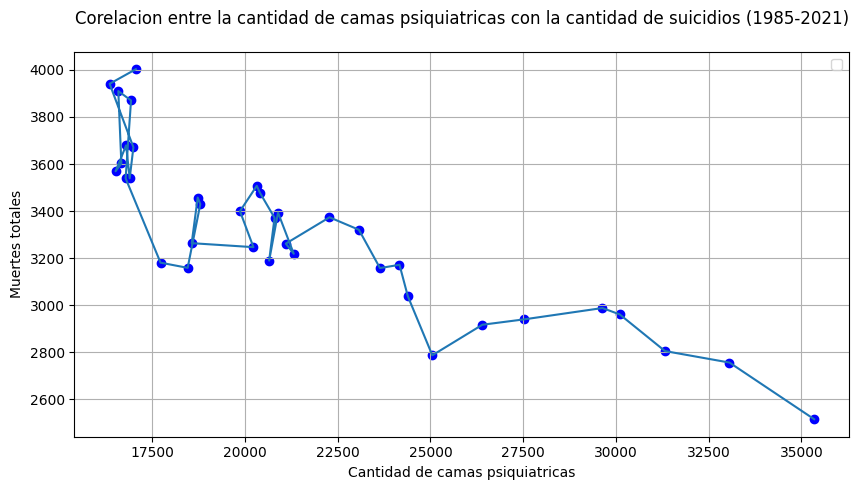

In [107]:
amount_ofpshyciatricbeds=pd.read_csv('data/HEALTH_REAC_31052024134047768.csv')

amount_ofpshyciatricbeds.drop(['VAR', 'Variable', 'UNIT', 'Measure', 'COU', 'Country', 'YEA', 'Flag Codes', 'Flags'],axis=1,inplace=True )

pivot_amountofpshycbeds = amount_ofpshyciatricbeds.pivot(index=None, columns='Year', values='Value')

pivot_amountofpshycbeds = pivot_amountofpshycbeds.ffill(axis=0).bfill(axis=0)

# Resetear el index para obtener un dataframe mas limpio
pivot_amountofpshycbeds.reset_index(drop=True, inplace=True)

pivot_amountofpshycbeds=pivot_amountofpshycbeds.loc[0:0,:]
pivot_amountofpshycbeds

spaintotal_deathsbyyear1985to2021=spaintotal_deathsbyyear[(spaintotal_deathsbyyear.index>=1985) & (spaintotal_deathsbyyear.index<2022)]

pivot_amountofpshycbeds.values

result_series = pivot_amountofpshycbeds.iloc[0]


print(np.corrcoef(result_series,spaintotal_deathsbyyear1985to2021))

plt.figure(figsize=(10, 5))
plt.scatter(result_series, spaintotal_deathsbyyear1985to2021.values, color='blue')
plt.title('Corelacion entre la cantidad de camas psiquiatricas con la cantidad de suicidios (1985-2021)', pad=20)
plt.xlabel('Cantidad de camas psiquiatricas')
plt.ylabel('Muertes totales')
plt.legend()
plt.plot(result_series,spaintotal_deathsbyyear1985to2021)
plt.grid(True)
plt.show()



Se analiza la cantidad de psiquiatras por año en España. Al igual que la cantidad de presupuesto, aunque la cantidad de psiquiatras sube igual sube las muertes, habiendo un coeficiente de corelacion moderadamente alto y positivo. Esta correlacion siendo de 0.64. Estos datos son desde 2000 hasta 2021.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1.         0.64441408]
 [0.64441408 1.        ]]


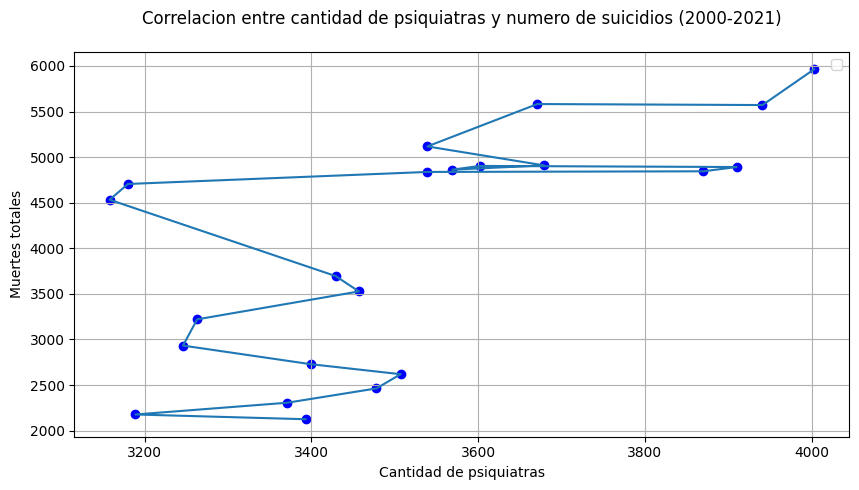

In [108]:
number_ofpshyciatrits=pd.read_csv('data/numerode_psiquiatras.csv')

number_ofpshyciatrits.drop(['VAR', 'Variable', 'UNIT', 'Measure', 'COU', 'Country', 'YEA', 'Flag Codes', 'Flags'],axis=1,inplace=True )

pivot_numberofpshycs = number_ofpshyciatrits.pivot(index=None, columns='Year', values='Value')

#Se hace esto para conseguir el valor solo de la primera columna
pivot_numberofpshycs= pivot_numberofpshycs.ffill(axis=0).bfill(axis=0)


pivot_numberofpshycs.reset_index(drop=True, inplace=True)


series_numberofpshycs = pivot_numberofpshycs.iloc[0]
series_numberofpshycs

spaintotal_deathsbyyear2000to2021=spaintotal_deathsbyyear[ (spaintotal_deathsbyyear.index>=2000) & (spaintotal_deathsbyyear.index<2022)]



print(np.corrcoef(spaintotal_deathsbyyear2000to2021,series_numberofpshycs))

plt.figure(figsize=(10, 5))
plt.scatter(spaintotal_deathsbyyear2000to2021.values, series_numberofpshycs.values, color='blue')
plt.title('Correlacion entre cantidad de psiquiatras y numero de suicidios (2000-2021)', pad=20)
plt.xlabel('Cantidad de psiquiatras')
plt.ylabel('Muertes totales')
plt.legend()
plt.plot(spaintotal_deathsbyyear2000to2021.values, series_numberofpshycs.values)
plt.grid(True)
plt.show()



Comparando el indice de vivienda con el numero de suicidios sale una relacion negativa debil. Esto indica que si los precios de vivienda suben , el numero de suicidios baja

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 1.         -0.22508348]
 [-0.22508348  1.        ]]


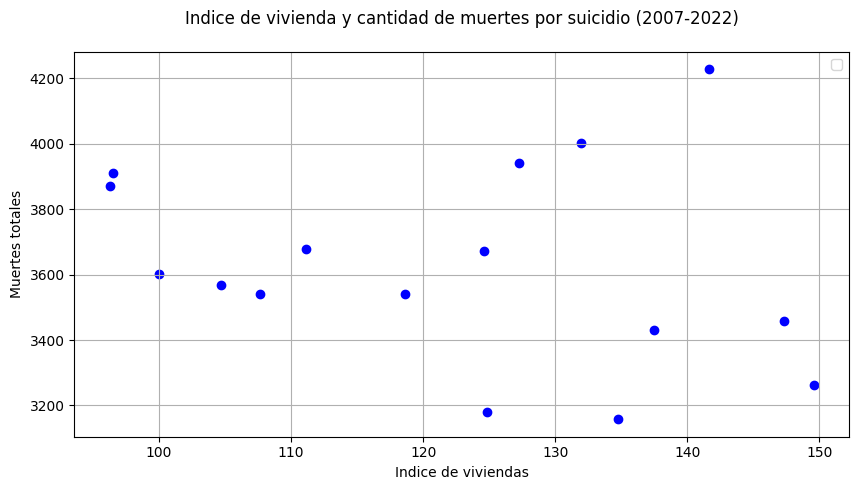

In [14]:
spaintotal_deathsbyyear2007to2022=spaintotal_deathsbyyear[ (spaintotal_deathsbyyear.index>=2007) & (spaintotal_deathsbyyear.index<=2023)]

housing_priceindex=pd.read_csv('data/Viviendadatos.csv',delimiter='\t', encoding='latin-1')

housing_priceindex=housing_priceindex[housing_priceindex['Periodo']!=2023]

#Se añade un punto y se convierte a float para que pueda ser analizado los valores
housing_priceindex['Total'] = housing_priceindex['Total'].str.replace(',', '.').astype(float)

housing_priceindexbyYear=housing_priceindex.groupby('Periodo')['Total'].sum()

print(np.corrcoef(housing_priceindexbyYear.values,spaintotal_deathsbyyear2007to2022))

plt.figure(figsize=(10, 5))
plt.scatter(housing_priceindexbyYear.values, spaintotal_deathsbyyear2007to2022.values, color='blue')
plt.title('Indice de vivienda y cantidad de muertes por suicidio (2007-2022)', pad=20)
plt.xlabel('Indice de viviendas')
plt.ylabel('Muertes totales')
plt.legend()
plt.grid(True)
plt.show()

En cambio, cuando poniendo los valores de  el alquiler medio, sale un coeficiente de corelacion positivo leve. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1.         0.26979728]
 [0.26979728 1.        ]]


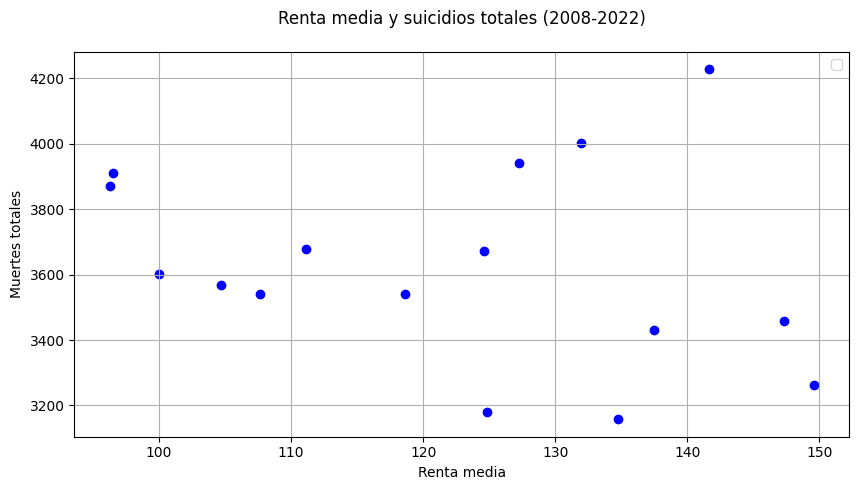

In [15]:
average_rent=pd.read_csv('data/Rentamedia.csv',delimiter='\t',encoding='latin-1')

average_rent=average_rent[average_rent['Periodo']!=2023]
average_rent_peryear=average_rent.groupby('Periodo')['Total'].sum()



spaintotal_deathsbyyear2008to2022=spaintotal_deathsbyyear[ (spaintotal_deathsbyyear.index>=2008) & (spaintotal_deathsbyyear.index<=2022)]

print(np.corrcoef(average_rent_peryear,spaintotal_deathsbyyear2008to2022))

plt.figure(figsize=(10, 5))
plt.scatter(housing_priceindexbyYear.values, spaintotal_deathsbyyear2007to2022.values, color='blue')
plt.title('Renta media y suicidios totales (2008-2022)', pad=20)
plt.xlabel('Renta media')
plt.ylabel('Muertes totales')
plt.legend()
plt.grid(True)
plt.show()



 "BORRAR "Los graficos de indice de vivienda y los de renta media son parecidos pero en lados opuestos, si sube el indice de vivienda baja los suicidios al mismo nivel que cuando si sube la renta media sube los suicidios.  Si se sigue la premisa de que una buena economia baja los niveles de suicidios, entonces tal vez se podria argumentar que la compra de viviendas es mas beneficioso para la economia que alquilar.

Ahora se analiza la tasa arope ( (At risk of poverty and/or exclusion) ) con la cantidad de suicidios totales

[[1.         0.31689324]
 [0.31689324 1.        ]]


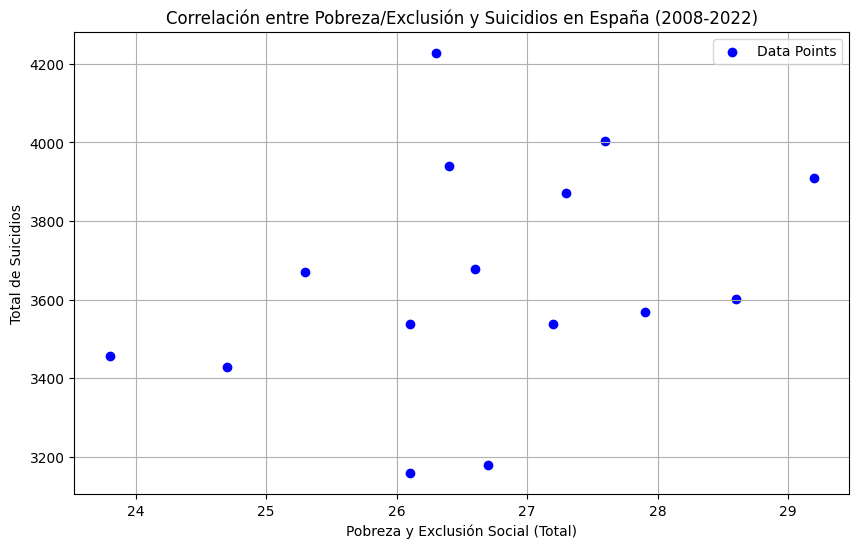

In [16]:
Poverty_exclusion=pd.read_csv('data/Pobreza_exclusiontotal.csv',delimiter='\t',encoding='latin-1')

#Cambiando para que los floats sean con . y no con ,
Poverty_exclusion['Total'] = Poverty_exclusion['Total'].str.replace(',', '.').astype(float)


Poverty_exclusion=Poverty_exclusion[Poverty_exclusion['Periodo']!=2023]
Poverty_exclusionbyyear=Poverty_exclusion.groupby('Periodo')['Total'].sum()

Poverty_exclusionbyyear
print(np.corrcoef(Poverty_exclusionbyyear.values,spaintotal_deathsbyyear2008to2022.values))


plt.figure(figsize=(10, 6))


plt.scatter(Poverty_exclusionbyyear.values, spaintotal_deathsbyyear2008to2022.values, color='blue', label='Data Points')


plt.title('Correlación entre Pobreza/Exclusión y Suicidios en España (2008-2022)')
plt.xlabel('Pobreza y Exclusión Social (Total)')
plt.ylabel('Total de Suicidios')
plt.legend()
plt.grid(True)


plt.show()


# ***CONCLUSIONES***

Los esfuerzos del gobierno hacia mejorar la salud mental no han sido efectivos

La inflacion tendra una corelacion positiva con la cantidad de suicidios

Los hombres jovenes seran el grupo con la cantidad de suicidios

Las comunidades con mas suicidios seran la comunidad con mas poblacion

Los indicadores del sector de vivienda tendran una correlacion positiva con la cantidad de suicidos

Primera hipotesis: Los esfuerzos del gobierno hacia mejorar la salud mental no han sido efectivos

Resultado: Se observa una correlación positiva entre la cantidad de presupuesto destinado a hospitales mentales y la cantidad de suicidios en hombres, con una correlación moderada positiva de 0.56. A pesar del aumento en el presupuesto, el porcentaje destinado a hospitales mentales se ha mantenido en un 0.80% del presupuesto total de sanidad. Al evaluar la cantidad de camas psiquiátricas, se encontró una correlación negativa muy alta de -0.87, indicando que mientras el número de camas disminuye, los suicidios aumentan. Por último, aunque el número de psiquiatras ha aumentado, no se ha observado una correlación negativa con la cantidad de muertes autoinfligidas, con un coeficiente de 0.64.

En conclusión, se puede argumentar que los esfuerzos del gobierno español para abordar este problema no han sido lo suficientemente efectivos y necesitan ser replanteados y mejor financiados.

Segunda hipotesis: La inflacion tendra una corelacion positiva con la cantidad de suicidios

Resultado:  Se observó una correlación muy alta entre la inflación y la cantidad de suicidios en hombres, con un coeficiente de 0.92. También se encontró una correlación alta con la cantidad de suicidios en mujeres, con un coeficiente de 0.80. Aunque la correlación no implica causalidad, estos resultados indican una relación significativa entre inflación y suicidios. Otros estudios también han encontrado una correlación entre estos dos factores, por lo que es crucial continuar investigando y analizando a medida que se obtienen más datos. Aunque no se puede comprobar la hipotesis de manera absoluta, definitivamente no se puede rechazar.


Tercera hipótesis: Los hombres jóvenes serán el grupo con la mayor cantidad de suicidios.

Resultado:
Esta hipótesis se puede rechazar, ya que el grupo con la mayor cantidad de suicidios es el de hombres de 55 a 74 años. Históricamente, este ha sido el grupo prevalente en los datos disponibles. Los siguientes grupos con mayor frecuencia de suicidios son los hombres de 35 a 54 años y los de 75 años o más, respectivamente.


Cuarta hipotesis:Las comunidades con mas suicidios seran la comunidad con mas poblacion

Resultado: En su mayoria, los datos comprobaron esta hipotesis. Las comunidades mas pobladas son las que tienen mas suicidios. Estos siendo Andalucia, Cataluña y Madrid. Con Galicia y la comunidad valenciana tambien son los que tienen mas suicidios pero algo para destacar es que la cantidad de suicidios en galicia se acerca mucho a la cantidad de la comunidad de valencia aunque los valores de poblacion tienen mas diferencia.  La diferencia entre la poblacion entre la poblacion de Valencia y galicia es de 51381571. En cambio la diferencia entre los numeros de suicidios es solo de 1222. 

Quinta hipotesis: Los indicadores del sector de vivienda tendran una correlacion positiva con la cantidad de suicidos

Resultado: Los resultados de este fueron mixtos. En cuestion con el indice de precio de  vivienda, hay una corelacion negativa decentemente moderada de -0.23. Pero con la renta media es lo opuesto, una correlacion  positiva decentemente moderada de 0.27.  Debido a los resultados contradictorios, no se puede afirmar de manera concluyente que los indicadores del sector de vivienda tengan una correlación positiva consistente con la cantidad de suicidios. Puede ser  que estas diferencias se deban a cómo distintos aspectos del mercado de la vivienda afectan el bienestar emocional de las personas. Por ejemplo, el aumento de los precios de la vivienda puede reflejar una economía en crecimiento que reduce el estrés financiero, mientras que el aumento de los costos de renta puede incrementar la presión económica, elevando el riesgo de suicidio.


Sexta hipotesis:Mientras mas suba la pobreza y los riesgos de exclusion mas subirian los numeros de suicidios. 

Resultado: Se encontro una correlacion positiva de 0.32. Aunque la correlación no es extremadamente alta, es significativa y destaca la importancia de los factores socioeconómicos en la salud mental. La pobreza y la exclusión social aumentan el estrés, limitan el acceso a recursos de salud mental y fomentan la desesperanza, elevando así la tasa de suicidios. Por lo tanto, es crucial que las políticas públicas y los programas de salud mental consideren estos factores. Mejorar las condiciones de vida, ofrecer apoyo económico y social, y facilitar el acceso a servicios de salud mental son estrategias clave para reducir los suicidios en poblaciones vulnerables.



